Delta-T [s] = 0.5253,  Ch2 Events = 223575, Freq [Hz] = 425607.49, 
Delta-T [s] = 0.5938,  Ch2 Events = 253598, Freq [Hz] = 427050.05, 
Delta-T [s] = 0.5229,  Ch2 Events = 222692, Freq [Hz] = 425871.74, 
Delta-T [s] = 0.5363,  Ch2 Events = 230954, Freq [Hz] = 430667.20, 
Delta-T [s] = 0.5246,  Ch2 Events = 223265, Freq [Hz] = 425564.70, 
Delta-T [s] = 0.5314,  Ch2 Events = 225972, Freq [Hz] = 425245.51, 
Delta-T [s] = 0.5253,  Ch2 Events = 223891, Freq [Hz] = 426211.64, 
Delta-T [s] = 0.5266,  Ch2 Events = 224410, Freq [Hz] = 426172.47, 
Delta-T [s] = 0.5418,  Ch2 Events = 231461, Freq [Hz] = 427170.76, 
Delta-T [s] = 0.5231,  Ch2 Events = 224007, Freq [Hz] = 428242.47, 
Delta-T [s] = 0.5231,  Ch2 Events = 223022, Freq [Hz] = 426379.40, 
Delta-T [s] = 0.5232,  Ch2 Events = 223341, Freq [Hz] = 426907.15, 
Delta-T [s] = 0.5414,  Ch2 Events = 231395, Freq [Hz] = 427436.48, 
Delta-T [s] = 0.5233,  Ch2 Events = 224111, Freq [Hz] = 428297.68, 
Delta-T [s] = 0.5233,  Ch2 Events = 223441, Freq

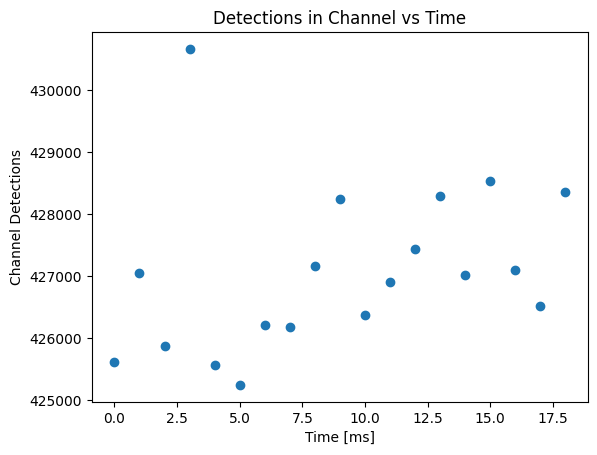

In [1]:
import sys
import time
import clr

# Paths for ttInterface.dll - Update these accordingly
sys.path.append('C:\\Users\\lab\\Downloads\\CD V2.35.01\\Applications\\TimeTagExplorer\\Release_2_35_64Bit\\Release')
clr.AddReference('C:\\Users\\lab\\Downloads\\CD V2.35.01\\Applications\\TimeTagExplorer\\Release_2_35_64Bit\\Release\\ttInterface.dll')


from System import Array, Byte, Int64, Int32
from TimeTag import TTInterface, Logic

# Initialize the time tagger
MyTagger = TTInterface()
MyTagger.Open()  

# Configure the channel for measurement
test_channel = 2
MyTagger.SetInputThreshold(test_channel, 0.5)

#Activate the Logic Mode:
MyLogic =  Logic(MyTagger)
MyLogic.SwitchLogicMode()

TimerCounter1 = Int32

MyLogic.ReadLogic()

#Initialise data (change this to dataframe)
counts_list = []
times = []

def clearBuffer():
    # Clear buffer from algorithm
    MyLogic.ReadLogic()
    TimeCounter1 = MyLogic.GetTimeCounter()

def readCounts(timeInterval):
    #Function which takes time for collection and returns counts + time
    #Collect Data
    time.sleep(timeInterval)

    #Read Counts + Time
    MyLogic.ReadLogic()
    TimeCounter1 = MyLogic.GetTimeCounter()
    counts=MyLogic.CalcCountPos(2**(k-1))
    delta_t=(TimeCounter1)*5e-9
    return counts, delta_t

def printData(counts, delta_t, k):
    delta_t_text = "Delta-T [s] = %.4f, " %(delta_t)
    counter_text = " Ch%d Events = %d," %(k,counts)
    freq_text = " Freq [Hz] = %.2f, " %(counts/delta_t)
    print(delta_t_text +counter_text + freq_text)
#measure channel k
k=test_channel
import numpy as np
for i in range (1,20):
    clearBuffer()

    counts, delta_t = readCounts(0.5)

    #Store Time and Counts
    counts_list.append(counts/delta_t)
    # times.append()

    printData(counts, delta_t, k)

    
    # Optimisation Algorithm
    time.sleep(np.random.random())
    


MyTagger.Close()

# The arrays 'chans' and 'times' now hold the readings for 1 second.
# Additional analysis can be done on these data as required.

import matplotlib.pyplot as plt

times_list = range(len(counts_list))

# Plot num_tags_list vs times_list
plt.scatter(times_list, counts_list)

plt.xlabel('Time [ms]')
plt.ylabel('Channel Detections')
plt.title('Detections in Channel vs Time')
plt.show()


In [2]:
MyTagger.Close()